In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.io import wavfile

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds
NOISE = 0.04  # To be added to the sine data

def generate_wav_data():
    sample_rate, data = wavfile.read('sample-input/crickets.wav')
    length = data.shape[0] / sample_rate

    time = np.linspace(0., length, data.shape[0])
    # plt.plot(time, data[:, 0], label="Left channel")
    # plt.plot(time, data[:, 1], label="Right channel")
    # plt.legend()
    # plt.xlabel("Time [s]")
    # plt.ylabel("Amplitude")
    # plt.show()
    return sample_rate, length, time, data[:, 0]

def generate_sine_data(freq, sample_rate, duration, noise):
    """Generates a sample sine wave with a specific sample rate, constant
    frequency and max amplitude of 1.0.
    """
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies) + (np.sin((2 * np.pi) * frequencies * 10) * 0.3)
    return sample_rate, duration, x, y



In [9]:
def acquire_data():
    return generate_sine_data(400, SAMPLE_RATE, DURATION, NOISE)
    # return generate_wav_data()

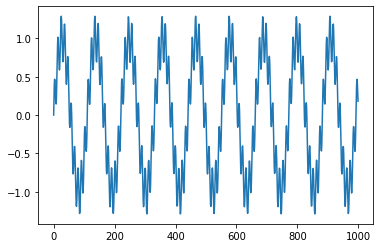

In [11]:
# Generate a 2 hertz sine wave that lasts for 5 seconds
sample_rate, duration, x, y = acquire_data()
plt.plot(y[:1000])
plt.show()

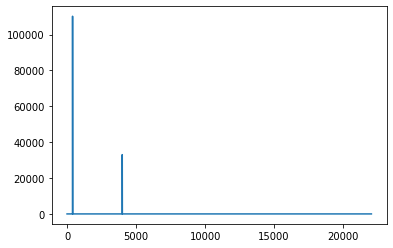

In [12]:

# Number of samples in normalized_tone
N = int(sample_rate * duration)

from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(y)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

In [16]:
import pandas as pd
from datetime import datetime
df = pd.DataFrame()
df['power'] = np.abs(yf)
df['frequency'] = xf
df['timestamp'] = datetime.now()
df['latitude'] = 32.9002239196049
df['longitude'] = -96.96302798539023

print(f'Original shape {df.shape}')

POWER_THRESHOLD = 10
df.loc[df.power < POWER_THRESHOLD, 'power'] = 0.0
print(f'Filtered shape {df.shape}')

df.head()

Original shape (110251, 5)
Filtered shape (110251, 5)


,power,frequency,timestamp,latitude,longitude
0,0.0,0.0,2021-10-13 19:56:12.667927,32.900224,-96.963028
1,0.0,0.2,2021-10-13 19:56:12.667927,32.900224,-96.963028
2,0.0,0.4,2021-10-13 19:56:12.667927,32.900224,-96.963028
3,0.0,0.6,2021-10-13 19:56:12.667927,32.900224,-96.963028
4,0.0,0.8,2021-10-13 19:56:12.667927,32.900224,-96.963028


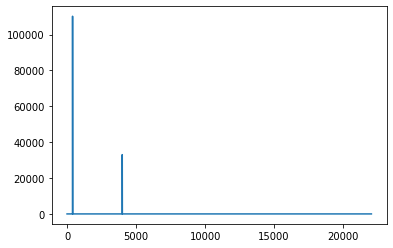

In [17]:
plt.plot(df.frequency, df.power)
plt.show()